# Preparation

First, you need to install Xinference with image support and huggingface-cli:
```shell
pip install xinference[image]
```

Then, download the Stable Diffusion model with ControlNet. You can download the model from the following link:
Stable Diffusion v1.5(_https://huggingface.co/runwayml/stable-diffusion-v1-5_)
MLSD ControlNet (_https://huggingface.co/lllyasviel/sd-controlnet-mlsd_)
```shell
huggingface-cli download --resume-download runwayml/stable-diffusion-v1-5 --local-dir "$(pwd)/stable-diffusion-v1-5"
huggingface-cli download --resume-download lllyasviel/sd-controlnet-mlsd --local-dir "$(pwd)/sd-controlnet-mlsd"
```

Then, start the Xinference server by the following command:
```shell
xinference-local
```

The Xinference server will be started:
```shell
2023-11-02 16:04:55,278 xinference   38878 INFO     Xinference successfully started. Endpoint: http://127.0.0.1:9997
2023-11-02 16:04:55,280 xinference.core.supervisor 38878 INFO     Worker 127.0.0.1:32187 has been added successfully
2023-11-02 16:04:55,281 xinference.deploy.worker 38878 INFO     Xinference worker successfully started.
```

# Register the Stable Diffusion model with MLSD ControlNet

Now, we have an inference server running at `http://127.0.0.1:9997` with empty models. Let's register the Stable Diffusion model and ControlNet.

In [7]:
import os
from xinference.core.utils import json_dumps
from xinference.client import Client
client = Client("http://127.0.0.1:9997")

dir_path = os.getcwd()
my_controlnet = {
    "model_family": "controlnet",
    "model_uid": "my_controlnet",
    "model_name": "my_controlnet",
    "model_uri": os.path.join(dir_path, "sd-controlnet-mlsd"),  # your controlnet path
}

my_model = {
    "model_family": "stable_diffusion",
    "model_uid": "my_image",
    "model_name": "my_sd",
    "model_uri": os.path.join(dir_path, "stable-diffusion-v1-5"),  # your model path
    "controlnet": [my_controlnet],
}

client.register_model(
    model_type="image",
    model=json_dumps(my_model),
    persist=False,
)

Let's launch the Stable Diffusion model with ControlNet. 

In [8]:
model_uid = client.launch_model(
    model_uid="my_image",
    model_name="my_sd",
    model_type="image",
    controlnet="my_controlnet",
)
model = client.get_model(model_uid)

Load a straight line image from the local.

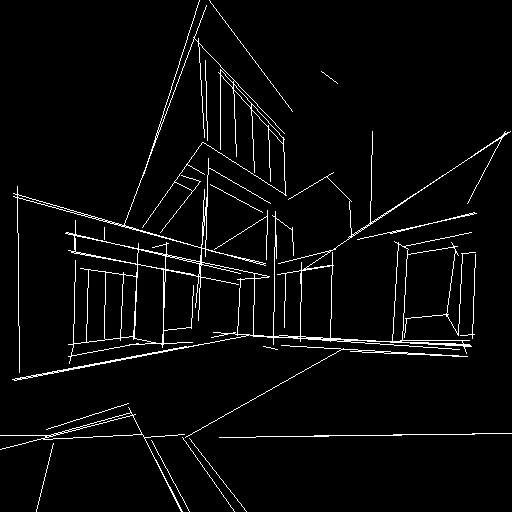

In [3]:
import os
from diffusers.utils import load_image

image_path = os.path.join(os.getcwd(), "draft.png")
image = load_image(image_path)
image

Call the image_to_image API to the Xinference to get the result.

In [9]:
import io

prompt = (
    "a modern house, use glass window, best quality, 8K wallpaper,(realistic:1.3), "
    "photorealistic, photo realistic, hyperrealistic, orante, super detailed, "
    "intricate, dramatic, morning lighting, shadows, high dynamic range,wooden,blue sky"
)
negative_prompt = (
    "low quality, bad quality, sketches, signature, soft, blurry, drawing, "
    "sketch, poor quality, ugly, text, type, word, logo, pixelated, "
    "low resolution, saturated, high contrast, oversharpened"
)
bio = io.BytesIO()
image.save(bio, format="png")
result_image = model.image_to_image(
    image=bio.getvalue(),
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
)
result_image

{'created': 1713508619,
 'data': [{'url': '/new_data3/wuzhaoxin/image/f02f5baa71fe434eb112cfbc4ca79d3d.jpg',
   'b64_json': None}]}

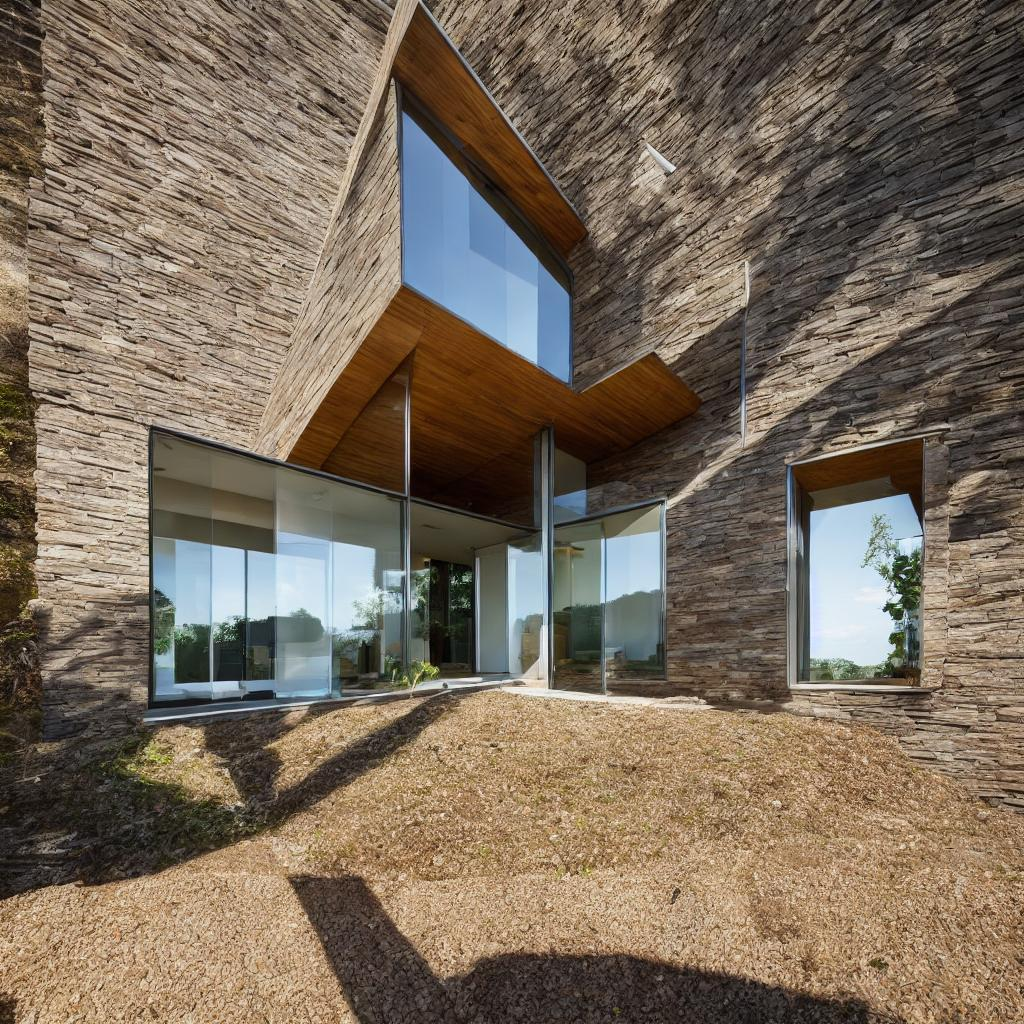

In [10]:
load_image("/Users/xprobe/.xinference/image/f02f5baa71fe434eb112cfbc4ca79d3d.jpg")